1729176621.782829: Called function ImageDataset.__init__ with following information:
   args:   ['<utils.dataset_utils.ImageDataset object at 0x13f835010>']
   kwargs: ['directory_path = pistachio_dataset/data/Kirmizi_Pistachio', 'img_size = (32, 32)']


/Users/aniket/PycharmProjects/windDM-diffusers/.venv/lib/python3.11/site-packages/accelerate/accelerator.py:443: UserWarning: `log_with=tensorboard` was passed but no supported trackers are currently installed.
  warnings.warn(f"`log_with={log_with}` was passed but no supported trackers are currently installed.")


1729176623.7990851: Called function MasterModel.load_from_stub with following information:
   args:   ['<core.master_model.MasterModel object at 0x2b3577a10>']
   kwargs: []


/Users/aniket/PycharmProjects/windDM-diffusers/.venv/lib/python3.11/site-packages/accelerate/checkpointing.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  optimizer_st

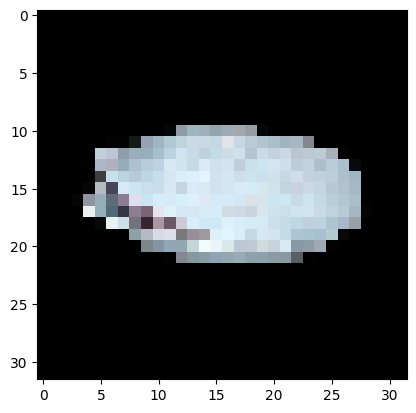

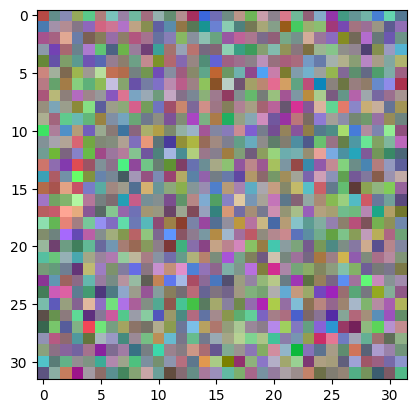

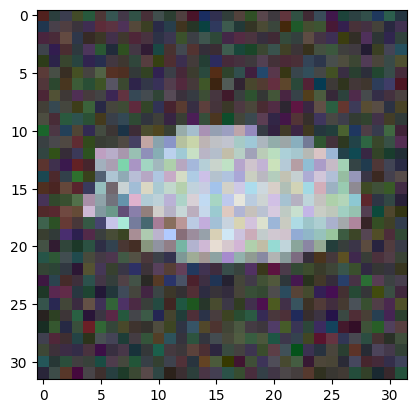

Timestep: 190
Denoised image:


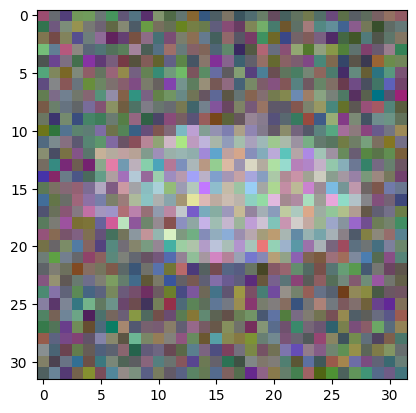

Current noise prediction (at timestep 190):


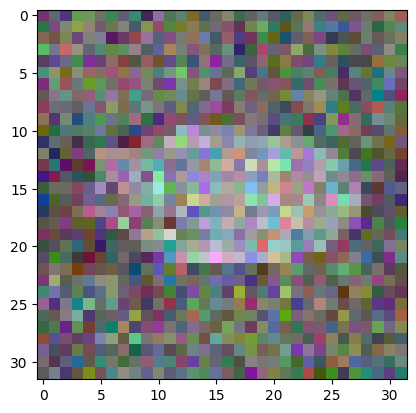

Timestep: 180
Denoised image:


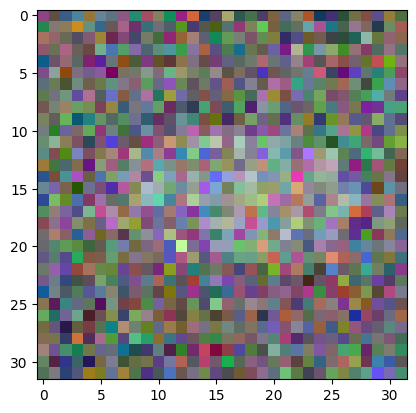

Current noise prediction (at timestep 180):


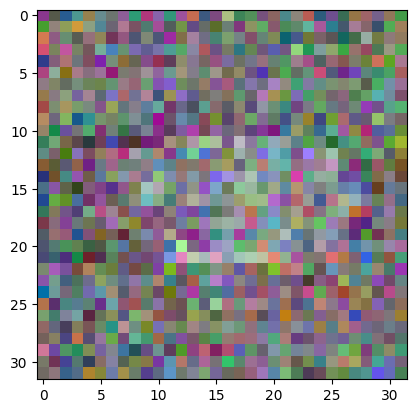

Timestep: 170
Denoised image:


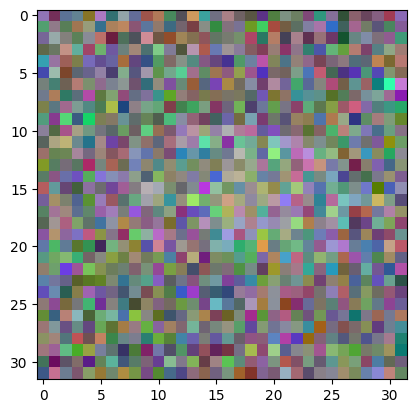

Current noise prediction (at timestep 170):


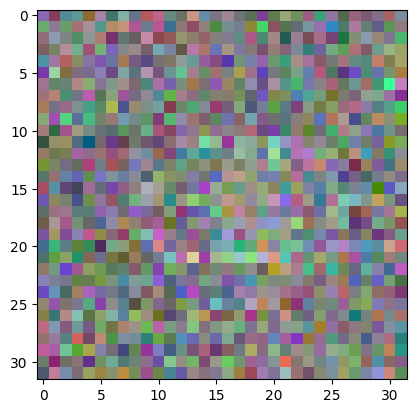

Timestep: 160
Denoised image:


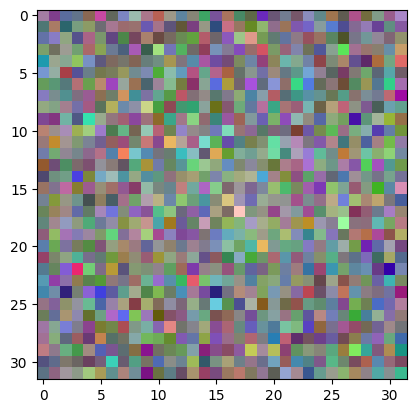

Current noise prediction (at timestep 160):


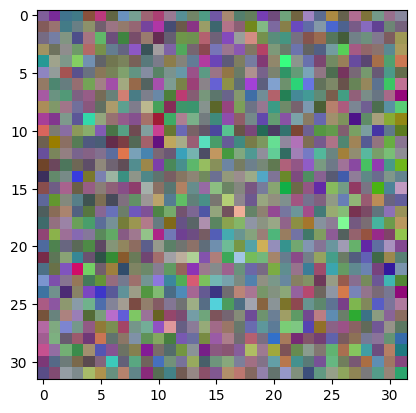

Timestep: 150
Denoised image:


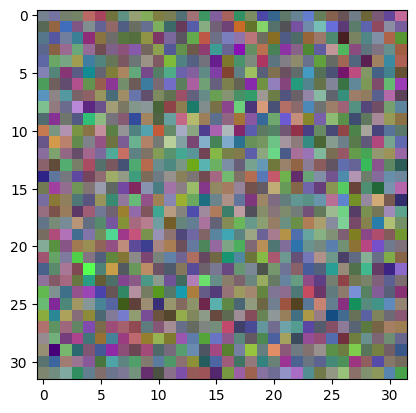

Current noise prediction (at timestep 150):


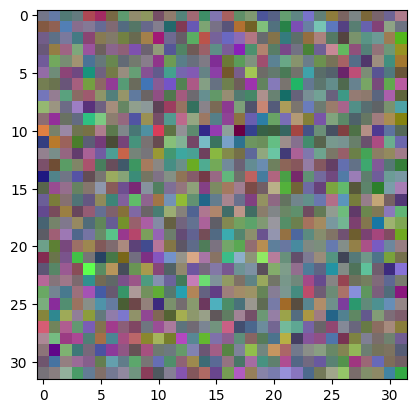

Timestep: 140
Denoised image:


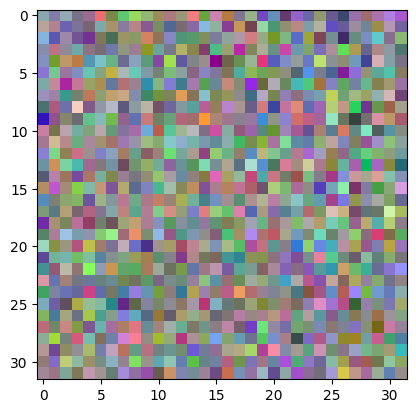

Current noise prediction (at timestep 140):


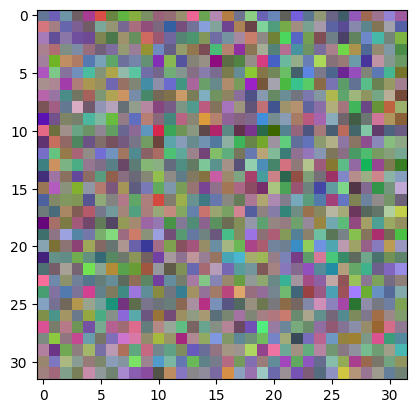

Timestep: 130
Denoised image:


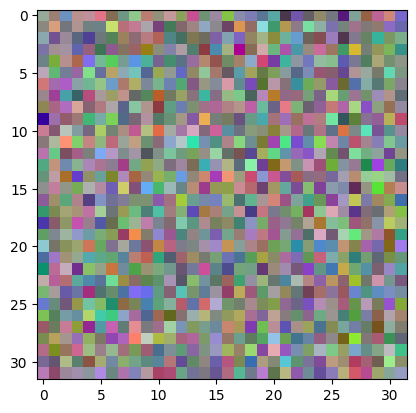

Current noise prediction (at timestep 130):


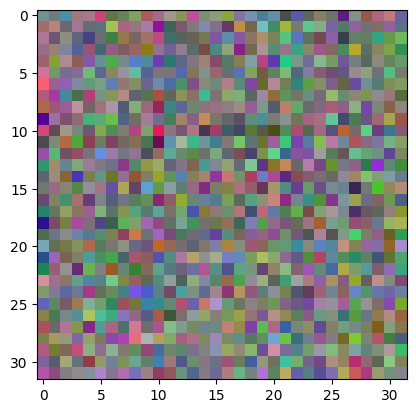

Timestep: 120
Denoised image:


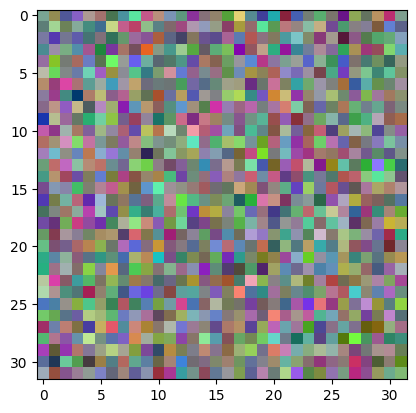

Current noise prediction (at timestep 120):


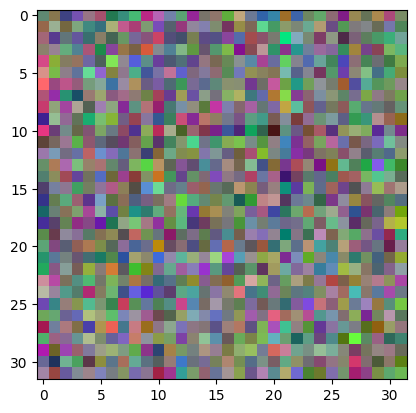

Timestep: 110
Denoised image:


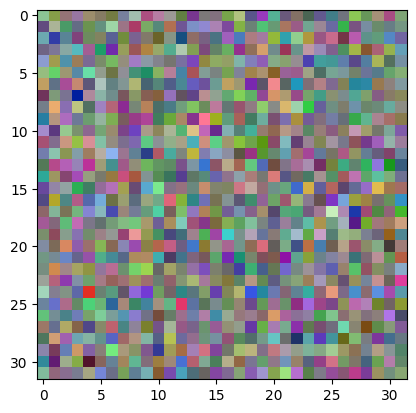

Current noise prediction (at timestep 110):


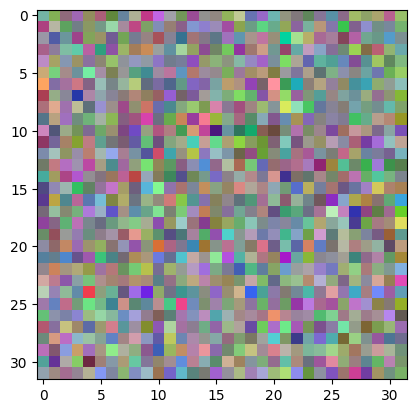

Timestep: 100
Denoised image:


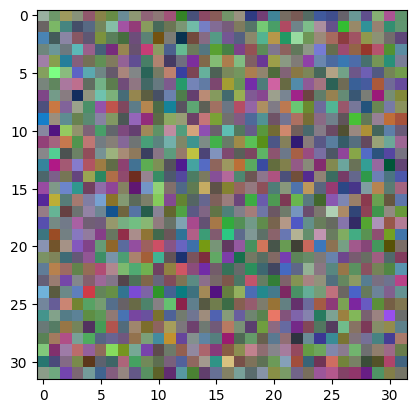

Current noise prediction (at timestep 100):


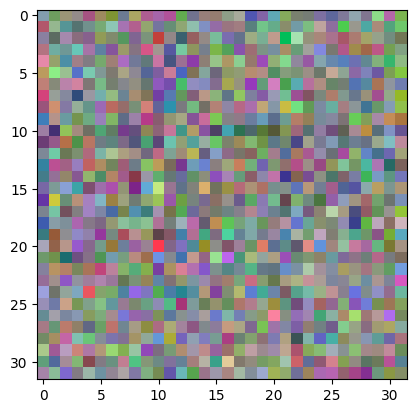

Timestep: 90
Denoised image:


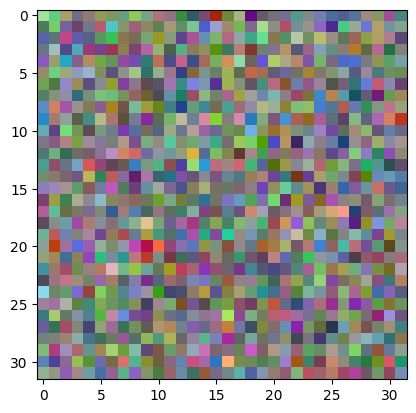

Current noise prediction (at timestep 90):


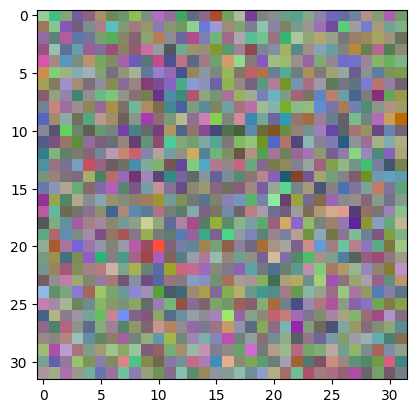

Timestep: 80
Denoised image:


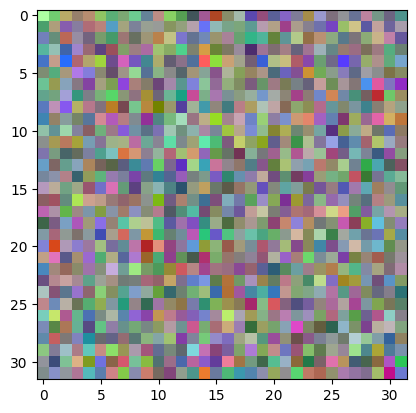

Current noise prediction (at timestep 80):


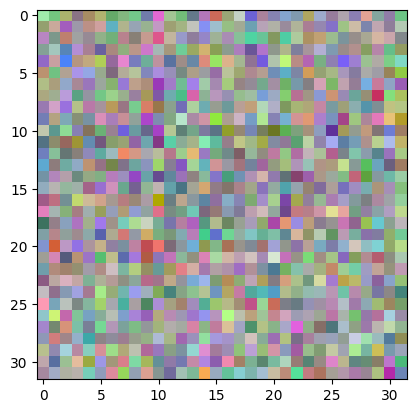

Timestep: 70
Denoised image:


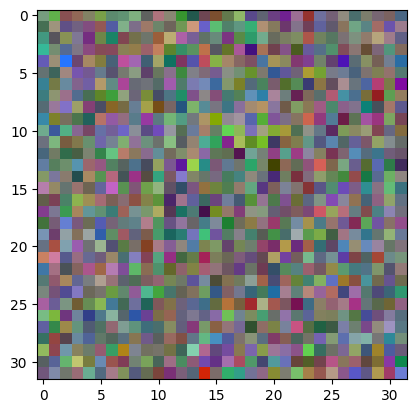

Current noise prediction (at timestep 70):


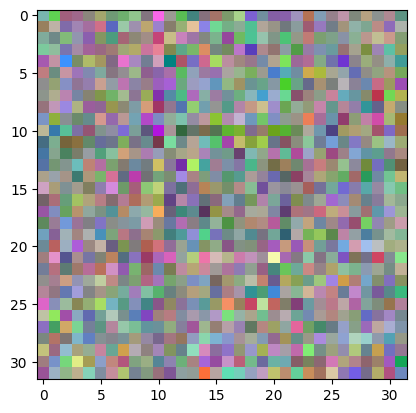

Timestep: 60
Denoised image:


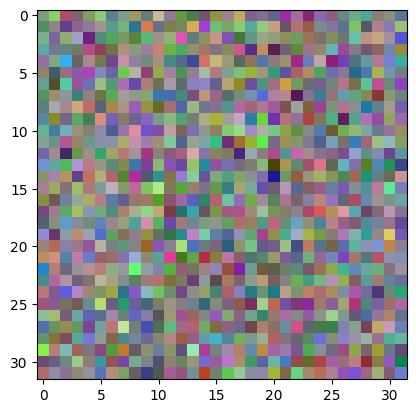

Current noise prediction (at timestep 60):


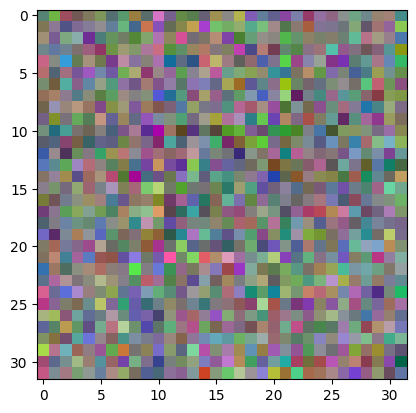

Timestep: 50
Denoised image:


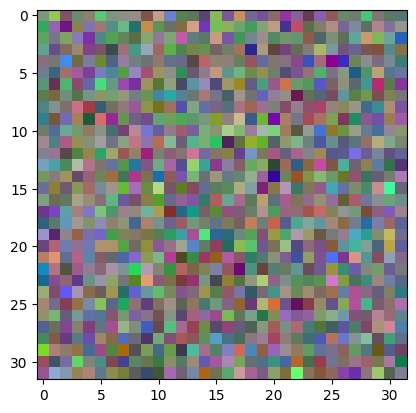

Current noise prediction (at timestep 50):


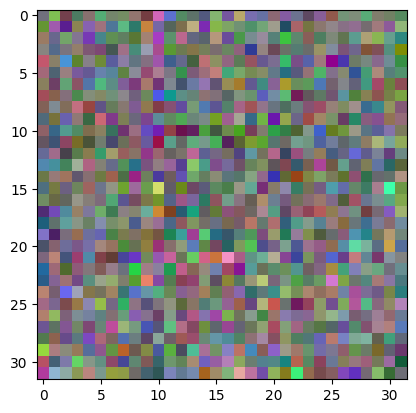

Timestep: 40
Denoised image:


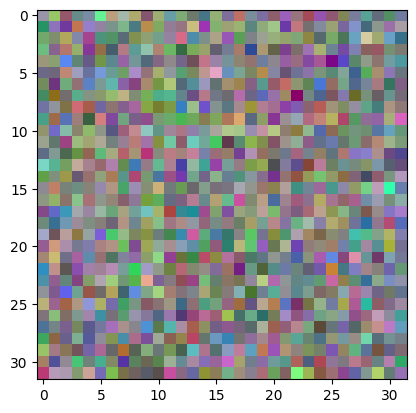

Current noise prediction (at timestep 40):


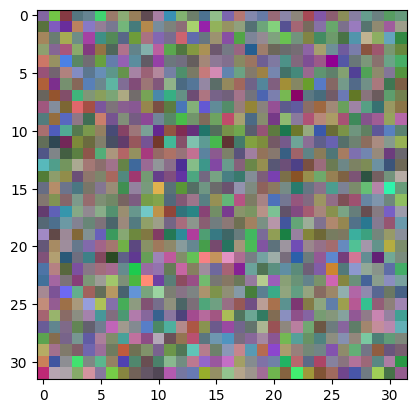

Timestep: 30
Denoised image:


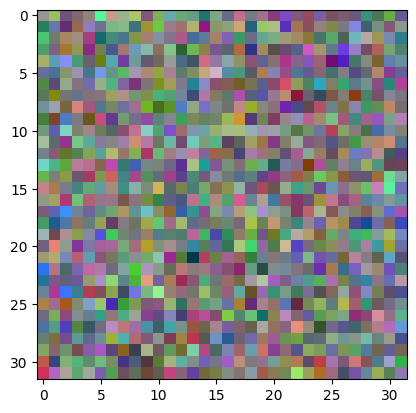

Current noise prediction (at timestep 30):


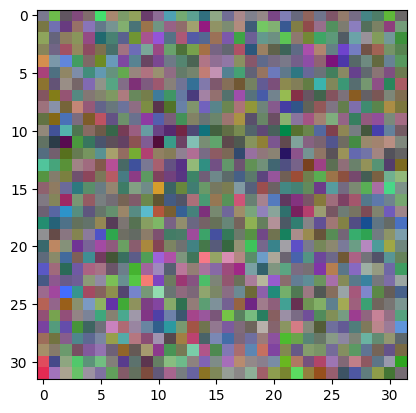

Timestep: 20
Denoised image:


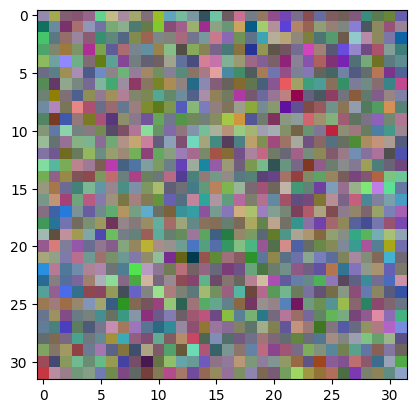

Current noise prediction (at timestep 20):


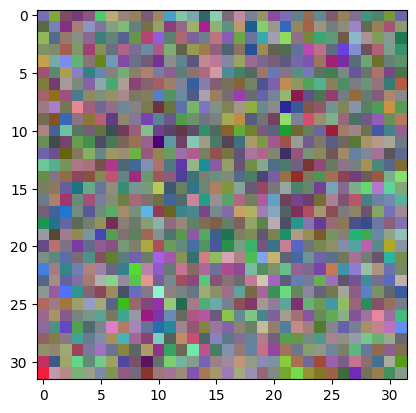

Timestep: 10
Denoised image:


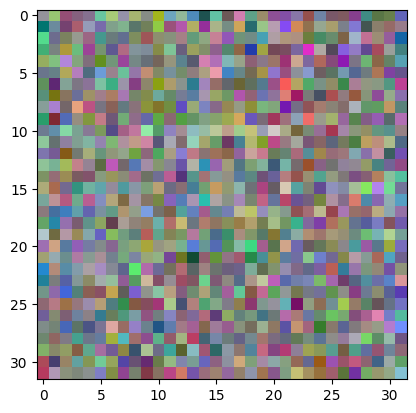

Current noise prediction (at timestep 10):


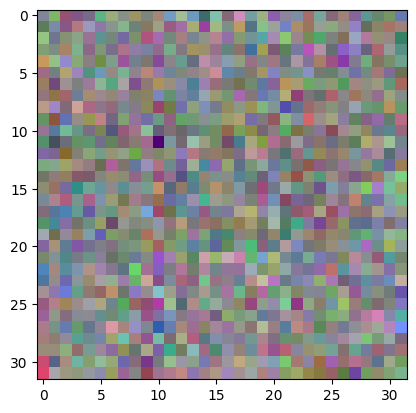

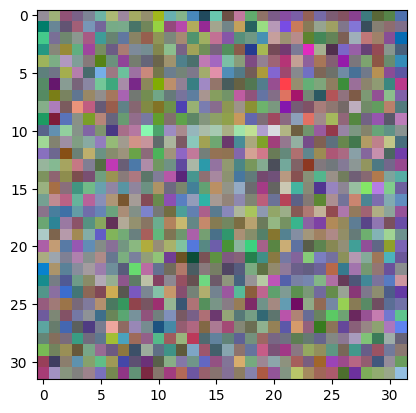

torch.Size([1, 3, 32, 32])


In [1]:
import utils
import torch
from core import UNet2D, MasterModel, TrainingConfig


device = 'mps' if torch.backends.mps.is_available() else 'cpu'

# Initialize:
images = utils.ImageDataset(directory_path="pistachio_dataset/data/Kirmizi_Pistachio",
                            img_size=(32, 32),
                            transforms=None)
model = UNet2D()
training_config = TrainingConfig(num_train_epochs=0)
master_model = MasterModel(model=model.model,
                           training_config=training_config,
                           train_dataset=images,
                           stub_path="stubs/diffusion-pistachio-32/model_trained_4")

# Information for denoising:
start_denoise_step = 200
num_denoising_steps = 200
denoising_step = - start_denoise_step // num_denoising_steps

# Visualizing the image we run denoising on:
this_image = images[0].unsqueeze(0).to(dtype=torch.float32)
_, _ = utils.ImageUtils.plot_torch(this_image)

# Visualizing the random noise we add to the image:
noise = torch.randn(this_image.shape, device=this_image.device)
_, _ = utils.ImageUtils.plot_torch(noise)

# Visualizing the noised image (at timestep start_denoise_step):
noisy = master_model.sampler.add_noise(this_image, noise, torch.Tensor([start_denoise_step]).long())
_, _ = utils.ImageUtils.plot_torch(noisy)
# Initializing noise_prediction to avoid issues in the denoising loop:
noise_prediction = torch.randn(this_image.shape, device=this_image.device)

count = 0
# Denoising loop
for i in range(start_denoise_step, 0, denoising_step):
    # Every 10 timesteps, we plot the denoised image, and the current noise prediction:
    if (count % 10 == 0) and (count > 0):
        print(f"Timestep: {i}")
        print(f"Denoised image:")
        denoised_img, _ = utils.ImageUtils.plot_torch(noisy)
        print(f"Current noise prediction (at timestep {i}):")
        noise_prediction_img, _ = utils.ImageUtils.plot_torch(noise_prediction)
    denoised = master_model.forward(noisy, torch.Tensor([i]), predict_denoised=True, device=device)
    noise_prediction = master_model.forward(noisy, torch.Tensor([i]), predict_denoised=False, device=device)
    noisy = denoised
    count += 1

denoised_img, _ = utils.ImageUtils.plot_torch(noisy)
print(noisy.shape)


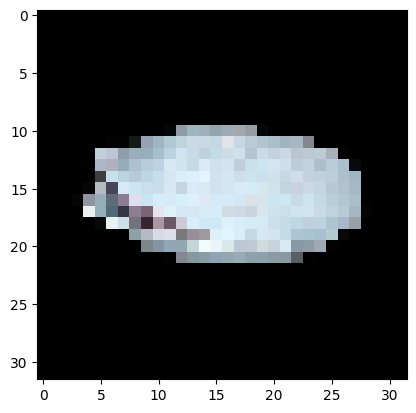

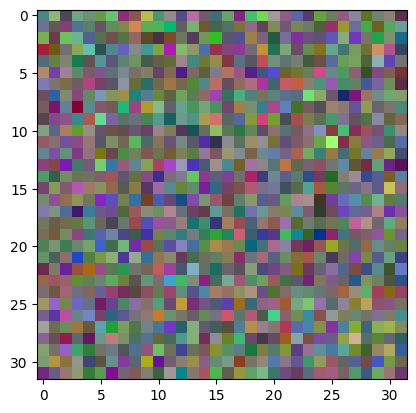

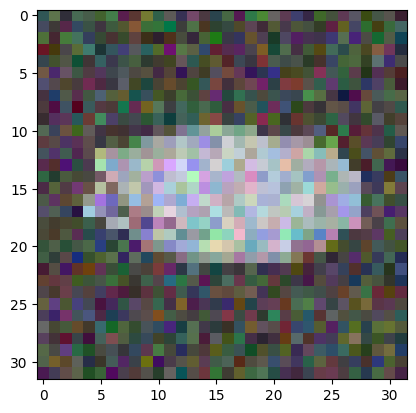

Timestep: 300


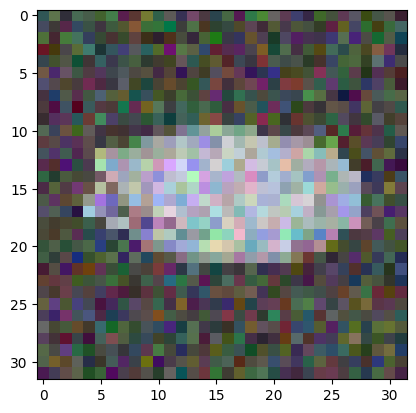

RuntimeError: MPS backend out of memory (MPS allocated: 9.03 GB, other allocations: 38.39 MB, max allowed: 9.07 GB). Tried to allocate 256.00 KB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

In [3]:
# Information for denoising:
start_denoise_step = 200
num_denoising_steps = 200
denoising_step = - start_denoise_step // num_denoising_steps

this_image = images[0].unsqueeze(0).to(dtype=torch.float32)
img, _ = utils.ImageUtils.plot_torch(this_image)

noise = torch.randn(this_image.shape, device=this_image.device)
img, _ = utils.ImageUtils.plot_torch(noise)

noisy = master_model.sampler.add_noise(this_image, noise, torch.Tensor([start_denoise_step]).long())
img, _ = utils.ImageUtils.plot_torch(noisy)

denoised = master_model.sampler.add_noise(this_image, noise, torch.Tensor([start_denoise_step]).long())
count = 0
# Denoising loop
for i in range(start_denoise_step, 0, denoising_step):
    if count % 10 == 0:
        print(f"Timestep: {i}")
        denoised_img, _ = utils.ImageUtils.plot_torch(denoised)
    denoised = master_model.forward(noisy, torch.Tensor([i]), predict_denoised=True, device=device)
    noisy = denoised
    count += 1

denoised_img, _ = utils.ImageUtils.plot_torch(denoised)
print(denoised.shape)